# Julia Basics

This document is derived from [JuliaBox's tutorial](https://github.com/JuliaComputing/JuliaBoxTutorials/tree/master/introductory-tutorials/intro-to-julia).

Julia is a dynamic language.  You don't need type declarations, and can change variable types dynamically and interactively.

For working with simple numbers, arrays, and strings, its syntax is *superficially* similar to Matlab, Python, and other popular languages.

In order to execute the "In" cells, select the cell and press Shift-Enter, or press the Play button above. To run the entire notebook, navigate to Cell and then click Run All.

The Jupyter Notebook can mix code, multimedia results, headings, documentation, equations like $\sqrt{\int x^2 dx}$, and even interactive widgets.

Julia documentation https://docs.julialang.org/en/stable/ is a very useful reference.

In the Jupyter Notebook Enter the command mode by Esc. Use `Esc+h` for help.   One useful command is `Esc+l`, which toggles the **line number**.

In this class, everyone who chooses to use Julia **MUST use Julia v1.1.1**

**Last revision**: 8/10/2019

In [1]:
A = rand(10,300)

10×300 Array{Float64,2}:
 0.334217   0.946561   0.337116   0.83822   …  0.327871  0.307057  0.278054
 0.156501   0.0880361  0.761649   0.847299     0.294348  0.839832  0.109649
 0.710295   0.300086   0.0387168  0.802627     0.270352  0.811974  0.369827
 0.57331    0.302826   0.181824   0.884636     0.61678   0.192053  0.673558
 0.0975686  0.823536   0.21586    0.162043     0.138314  0.708852  0.565358
 0.0115188  0.154203   0.468241   0.734865  …  0.951957  0.826101  0.38633 
 0.543529   0.351949   0.718841   0.421919     0.584448  0.593353  0.432584
 0.11271    0.899613   0.989049   0.688528     0.70605   0.373449  0.132814
 0.986318   0.079025   0.913079   0.510234     0.921148  0.44303   0.628399
 0.318049   0.27671    0.694359   0.936198     0.133211  0.104066  0.243844

It has all of the usual built-in Matlab/Numpy-like linear-algebra and vector functions:

In [2]:
# Basic linear algebra routines are in the LinearAlgebra package (no need to install separately)
using LinearAlgebra


b = rand(10) # a random rank-10 vector
x = A \ b    # solve for x satisfying A*x = b; has rank 300
B = A' * A   # A-transpose multiplied by A; is a 300x300 symmetrix matrix with real eigenvalues
eB = eigvals(B)

300-element Array{Float64,1}:
  -3.8956867956805855e-13
  -2.8087990613468505e-13
  -2.1311982977300925e-13
  -1.7953211599480762e-13
  -1.7708368896568637e-13
  -1.4558790432092988e-13
  -1.0646393823573165e-13
  -9.316897029312948e-14 
  -7.145604072968797e-14 
  -6.203637462915722e-14 
  -4.812049307622133e-14 
  -3.8306733551851506e-14
  -3.6619170582781145e-14
   ⋮                     
   3.1919628862603613e-13
   3.3508284519710845e-13
  17.26932813670075      
  19.95800987028425      
  21.423623770178217     
  23.1792024796099       
  24.759343491788048     
  25.943674405513057     
  28.303432968825774     
  28.91242774154592      
  29.301815871854778     
 763.948509572391        

It also supports convenient vectorisation of functions using the `.` operator:

In [3]:
#]add SpecialFunctions
using SpecialFunctions

println(size(x))

# @. is a macro that vectorizes the line
# equivalent to adding vectorization to each operation
# eB .- 2x.^2 .+ 4x .- 6

@. eB - 2x^2 + 4x - 6

(300,)


300-element Array{Float64,1}:
  -5.936622175953588
  -6.02885251360749 
  -5.981177825953301
  -5.977583241235306
  -5.972325527167088
  -5.954465293581916
  -6.016483049779459
  -5.927899807823802
  -5.97309018862416 
  -5.954846533364015
  -6.005439045399851
  -5.996699877989213
  -5.997558125290735
   ⋮                
  -6.004160287342918
  -5.936089306951563
  11.313746655312574
  13.980030062619889
  15.45481257886793 
  17.181480387524086
  18.765945572871733
  19.949886964042552
  22.389293171746147
  22.96452596836361 
  23.35675787565577 
 757.9732483997548  

Complex numbers and arbitrary-precision arithmetic (via MPFR) are available, of course.

In [4]:
cos(big(3 + 4im))

-27.03494560307422464769480266827091348467753695567661661019265514673434246483996 - 3.851153334811777536563337123053124569704160846091637003157728595256494186490506im

## Unicode

All strings are UTF-8 encoded Unicode by default (UTF-16 and UTF-32 also supported):

In [5]:
# regex search of a Unicode string
# This replaces the old matchall function
collect((m.match for m = eachmatch(r"\s[a-z]+", "α is a Grëék letter"))) 

3-element Array{SubString{String},1}:
 " is"    
 " a"     
 " letter"

Like Python 3, variable names can be Unicode, but Julia allows a somewhat wider range of codepoints in identifiers, which can be typed by LaTeX-like tab-completion *\hat[TAB]\alpha[TAB]*.

In [6]:
α̂= 7
ħ = 6.62606957e-34 / 2π
ẋ = ħ *α̂

7.3820020773540256e-34

Unlike Python 3, Unicode math operators are parsed as infix operators, which are available for user-defined meanings:

In [7]:
≪(x,y) = x < 0.1*y
50 ≪ 100, 5 ≪ 100, 5 ≤ 50

(false, true, true)

In [8]:
const ⊗ = kron

# Note that eye(N,N) is deprecated for representing the identity matrix

Matrix(I,2,2) ⊗ rand(2,2)

4×4 Array{Float64,2}:
 0.682788  0.724882  0.0       0.0     
 0.401396  0.663369  0.0       0.0     
 0.0       0.0       0.682788  0.724882
 0.0       0.0       0.401396  0.663369

## Functions and JIT-compilation

Functions can be defined in several ways, and *don't require type-declarations*.

In [9]:
# verbose form:
function foo(x)
    return x + 1
end

# one-line form:
foobar(x) = x + 2

# anonymous function
x -> x + 3

#5 (generic function with 1 method)

In [10]:
foo(3) # compiles foo for Int arguments

4

In [11]:
foo(7) # re-uses compiled foo(Int)

8

In [12]:
foo(7.3) # compiles a different version for Float64 arguments

8.3

In [13]:
# Use vectorization

@. foo([1,2,7,9]) 

4-element Array{Int64,1}:
  2
  3
  8
 10

# Plotting in Julia

We will use the PyPlot package to plot with Julia. This notebook has a few examples to get you started. The [PyPlot.jl](https://github.com/stevengj/PyPlot.jl) site has excellent documentation for plotting.

Loading the PyPlot module may take a few seconds.

In general, all of the arguments, including keyword arguments, are exactly the same as in Python. (With minor translations, of course, e.g. Julia uses `true` and `nothing` instead of Python's `True` and `None`.)

The full matplotlib.pyplot API is far too extensive to describe here; see the [matplotlib.pyplot documentation](http://matplotlib.org/api/pyplot_api.html) for more information. The Matplotlib version number is returned by PyPlot.version.


In [14]:
#]add PyPlot
using PyPlot

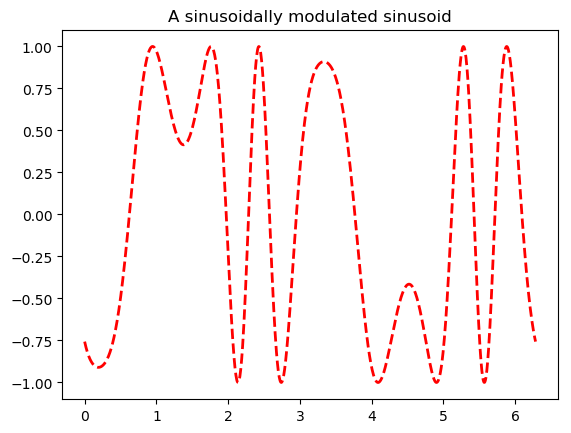

PyObject Text(0.5, 1.0, 'A sinusoidally modulated sinusoid')

In [30]:
# range plays the role of linspace starting from v0.7.0

x = range(0,stop=2*pi,length=1000)
y = similar(x)
@. y = sin(3*x + 4*cos(2*x))

plot(x, y, color="red", linewidth=2.0, linestyle="--")
title("A sinusoidally modulated sinusoid")

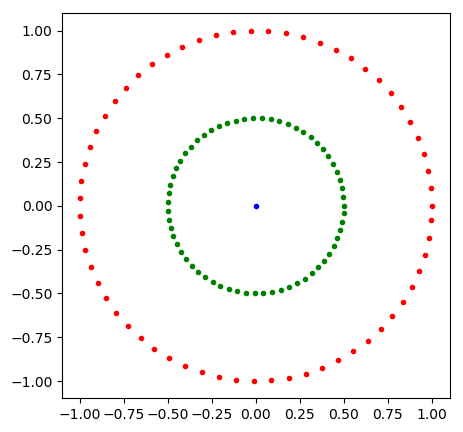

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000038DAFA20>

In [16]:
# Draw (x, y) points
figure(figsize=(5, 5))
θ = collect(0:0.1:2π)
plot(0,0,"b.")
plot(cos.(θ), sin.(θ), "r.")
plot(0.5cos.(θ), 0.5sin.(θ), "g.")

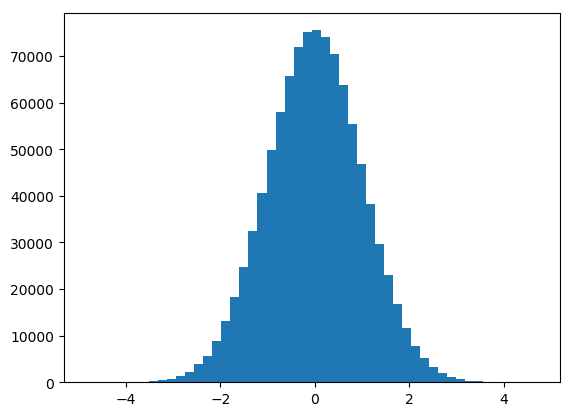

In [31]:
# Draw a histogram

y = randn(10^6)
hist(y, 50);    

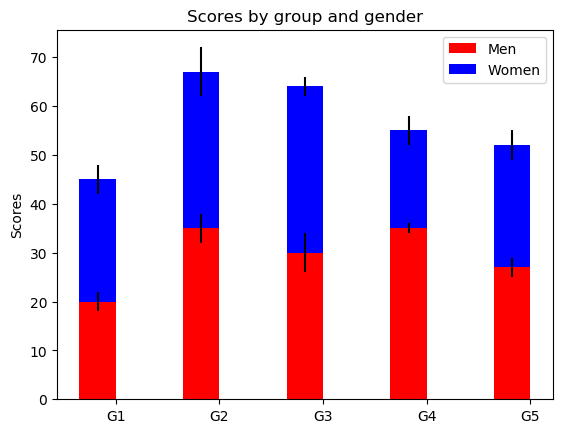

PyObject <matplotlib.legend.Legend object at 0x0000000001691F60>

In [34]:
# Draw a stacked bar chart

N = 5
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd     = (2, 3, 4, 1, 2)
womenStd   = (3, 5, 2, 3, 3)
ind = 1:N    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = PyPlot.bar(ind, menMeans, width, color="r", yerr=menStd)
p2 = PyPlot.bar(ind, womenMeans, width, bottom=menMeans, color="b", yerr=womenStd)

ylabel("Scores")
title("Scores by group and gender")
xticks(ind .+ width/2., ("G1", "G2", "G3", "G4", "G5") )
legend( (p1[1], p2[1]), ("Men", "Women") )


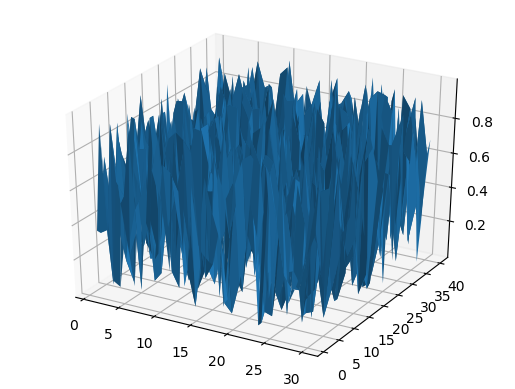

PyObject <mpl_toolkits.mplot3d.art3d.Poly3DCollection object at 0x000000003A70D940>

In [19]:
# Plot a random surface

surf(rand(30,40))